<a href="https://colab.research.google.com/github/DollyVishnu/fmml-lab/blob/main/Another_copy_of_Regression_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Akshit Garg
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


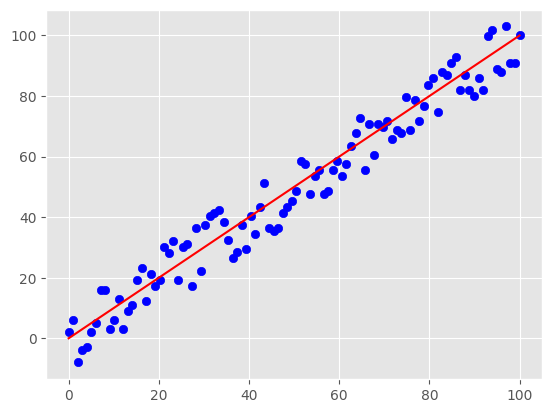

In [ ]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

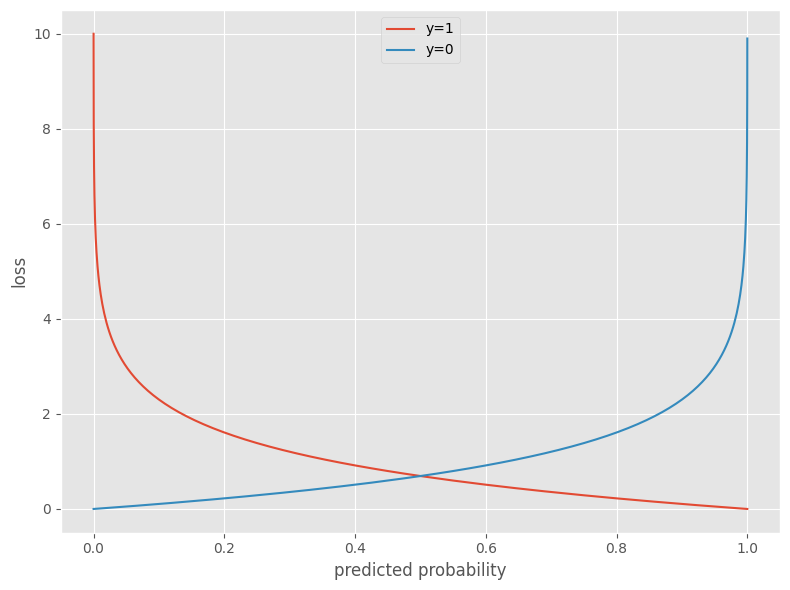

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

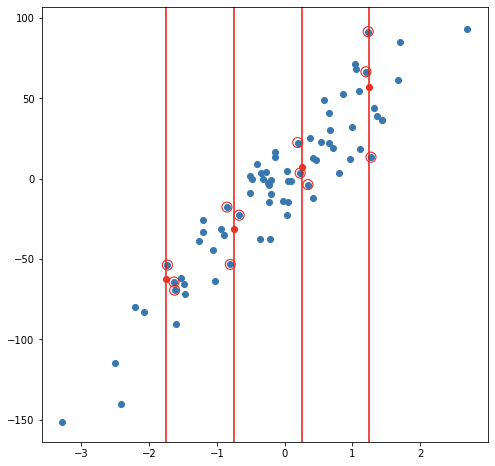

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-8-16fc6f082614>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-8-16fc6f082614>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

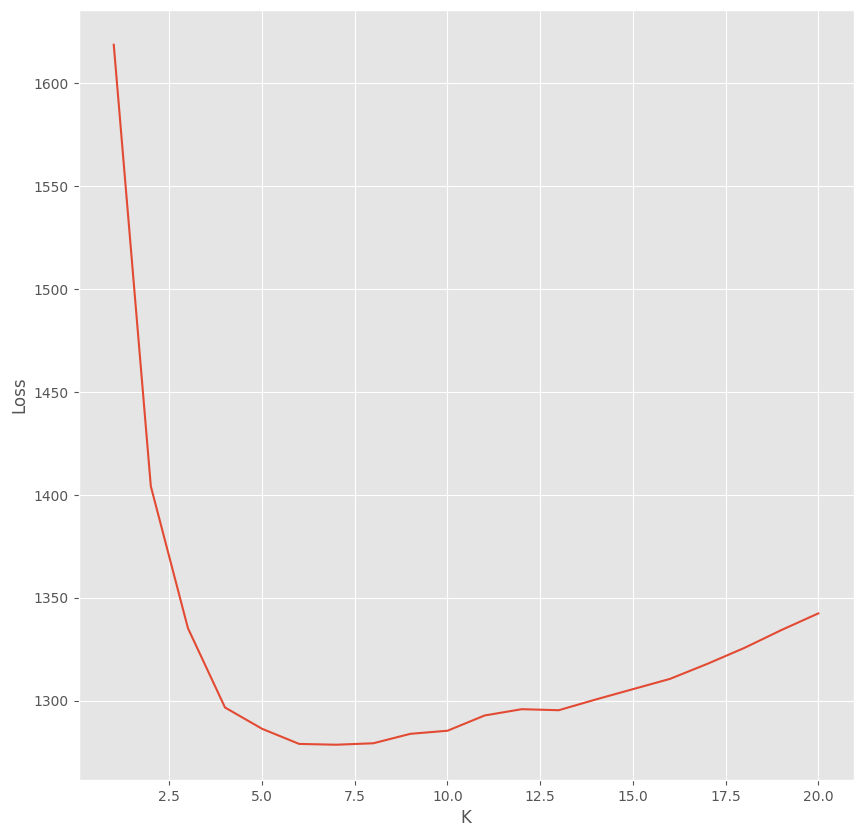

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function

MSE Model:
  MSE: 482.85376029172266
  R-squared: -0.091607264556828

MAE Model (Huber Regressor):
  MAE: 11.017624158032472
  R-squared: -0.2769160886830724

Huber Loss Model:
  MSE: 558.6030977754072
  R-squared: -0.26285689308327753


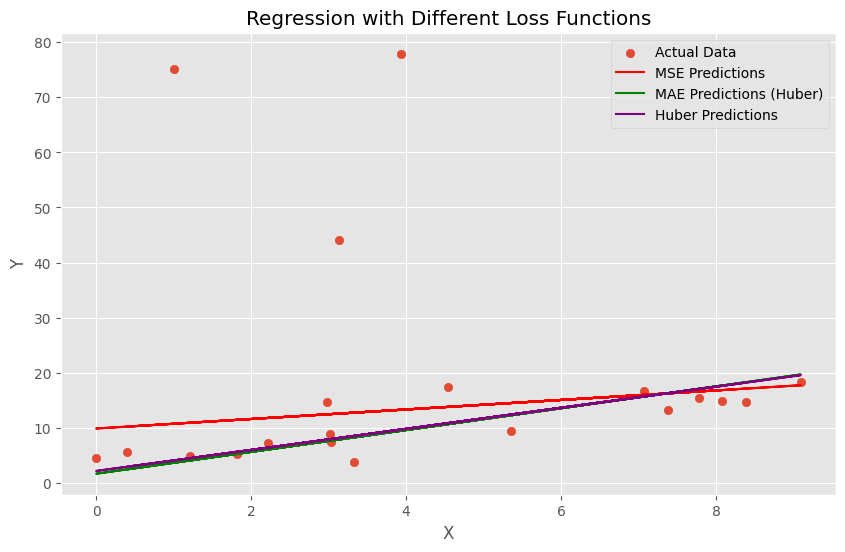

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate some synthetic data with outliers
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, 100)
# Add some outliers
X[np.random.randint(0, 100, 10)] = np.random.uniform(0, 10, 10).reshape(-1, 1)  # Outlier X values
y[np.random.randint(0, 100, 10)] = y[np.random.randint(0, 100, 10)] * 4 + np.random.normal(0, 5, 10) # Outlier Y values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Mean Squared Error (MSE)
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)
y_pred_mse = model_mse.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mse)
r2_mse = r2_score(y_test, y_pred_mse)

# 2. Mean Absolute Error (MAE) - Using a Huber Regressor as a proxy for direct MAE optimization (scikit-learn doesn't have a direct MAE regressor for simple linear regression)
from sklearn.linear_model import HuberRegressor
model_mae = HuberRegressor(epsilon=1.35)  # 1.35 is a common default epsilon
model_mae.fit(X_train, y_train)
y_pred_mae = model_mae.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_mae)
r2_mae = r2_score(y_test, y_pred_mae)

# 3. Huber Loss
model_huber = HuberRegressor(epsilon=2.0) # Example epsilon
model_huber.fit(X_train, y_train)
y_pred_huber = model_huber.predict(X_test)
huber_loss = mean_squared_error(y_test, y_pred_huber) # While Huber loss is optimized, MSE is still used for evaluation
r2_huber = r2_score(y_test, y_pred_huber)

# Print and Plot
print("MSE Model:")
print(f"  MSE: {mse}")
print(f"  R-squared: {r2_mse}")

print("\nMAE Model (Huber Regressor):")
print(f"  MAE: {mae}")
print(f"  R-squared: {r2_mae}")

print("\nHuber Loss Model:")
print(f"  MSE: {huber_loss}")
print(f"  R-squared: {r2_huber}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred_mse, color='red', label="MSE Predictions")
plt.plot(X_test, y_pred_mae, color='green', label="MAE Predictions (Huber)")
plt.plot(X_test, y_pred_huber, color='purple', label="Huber Predictions")

plt.legend()
plt.title("Regression with Different Loss Functions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Further Analysis:

# 1. Outlier Sensitivity: Observe how the MSE model is more affected by outliers (look at the plot).  The MAE and Huber models are more robust.

# 2. R-squared: Compare the R-squared values.  A higher R-squared indicates a better fit.  You'll likely see the MAE and Huber models perform better in the presence of outliers.

# 3. Visual Inspection: The plot provides a clear visual representation of how each model handles the outliers.

# 4. Experiment with Epsilon (Huber): Change the 'epsilon' parameter in the HuberRegressor and observe how it affects the model's sensitivity to outliers.  A smaller epsilon makes it closer to MSE, and a larger epsilon makes it closer to MAE.

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load a dataset (California Housing - you can change this)
X, y = fetch_california_housing(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_knn(X_train, y_train, X_test, y_test, k, dataset_name):
    """Evaluates KNN regression for a specific k and plots the results."""

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Dataset: {dataset_name}")
    print(f"K: {k}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

    # Plotting (adapt for higher dimensions if needed)
    if X_test.shape[1] <= 2:  # Plot only for 1D or 2D data for easy visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:, 0], y_test, label="Actual Data")  # Assuming at least one feature
        plt.scatter(X_test[:, 0], y_pred, color='red', label=f"KNN Predictions (k={k})")
        plt.legend()
        plt.title(f"KNN Regression on {dataset_name} (k={k})")
        plt.xlabel("Feature 1")  # Adapt labels if needed
        plt.ylabel("Target")
        plt.show()
    else:
        print(f"Plotting not supported for {X_test.shape[1]}-dimensional data. Consider dimensionality reduction.")

    return mse, r2


# Experiment with k=1
mse_1, r2_1 = evaluate_knn(X_train, y_train, X_test, y_test, 1, "California Housing")

# Experiment with k = size of training set
k_large = len(X_train)
mse_large, r2_large = evaluate_knn(X_train, y_train, X_test, y_test, k_large, "California Housing")

print("\n--- Comparison ---")
print("K=1:")
print(f"  MSE: {mse_1}")
print(f"  R-squared: {r2_1}")

print(f"\nK={k_large} (Training Set Size):")
print(f"  MSE: {mse_large}")
print(f"  R-squared: {r2_large}")

# Analysis:
# K=1:  Overfitting.  The model perfectly memorizes the training data, leading to very low training error but high test error.  Sensitive to noise.  The decision boundaries are very complex and adapt to individual data points.

# K=Training Set Size:  Underfitting.  The model predicts the average (or a weighted average) of the training set for all test points.  This is because every test point is "closest" to all training points equally.  Poor performance on both training and test data.  The decision boundary is essentially a horizontal line (for 1D regression).

# Ideal K:  The best K is usually somewhere between these extremes.  It balances the trade-off between bias and variance.  Use techniques like cross-validation (e.g., with GridSearchCV) to find the optimal K.

Dataset: California Housing
K: 1
MSE: 0.6690121695201793
R-squared: 0.48946307555198154
Plotting not supported for 8-dimensional data. Consider dimensionality reduction.
Dataset: California Housing
K: 16512
MSE: 1.3106960720039365
R-squared: -0.00021908714592466794
Plotting not supported for 8-dimensional data. Consider dimensionality reduction.

--- Comparison ---
K=1:
  MSE: 0.6690121695201793
  R-squared: 0.48946307555198154

K=16512 (Training Set Size):
  MSE: 1.3106960720039365
  R-squared: -0.00021908714592466794


Try out KNN-regression on other datasets see which values of K give the best results

Dataset: California Housing
Best K: 11
MSE: 0.41859323965701034
R-squared: 0.6805629031793323
Plotting not supported for 8-dimensional data.  Consider dimensionality reduction.
Dataset: Diabetes
Best K: 18
MSE: 3057.9618532390064
R-squared: 0.4228247890228536
Plotting not supported for 10-dimensional data.  Consider dimensionality reduction.
Dataset: Synthetic
Best K: 3
MSE: 278.3100472552617
R-squared: 0.9702882166864987


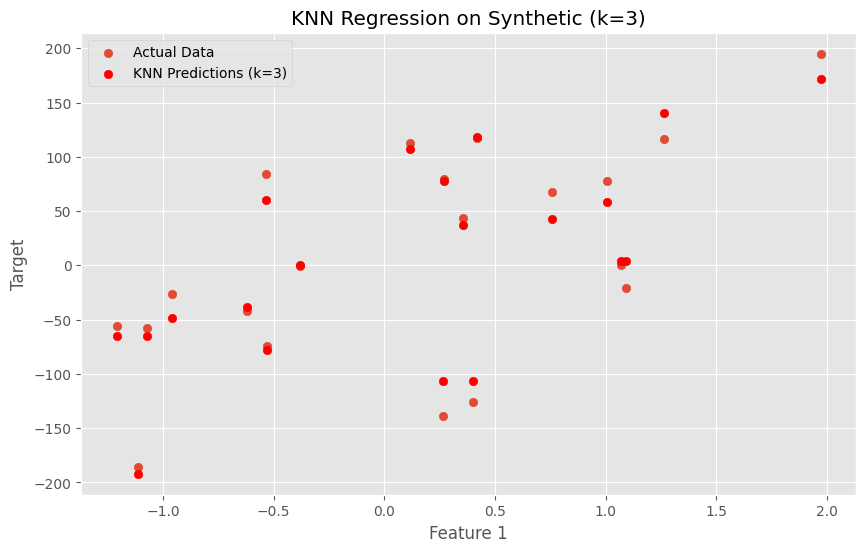

Dataset: Breast Cancer (Regression)
Best K: 4
MSE: 0.03289473684210526
R-squared: 0.8599737962659679
Plotting not supported for 30-dimensional data.  Consider dimensionality reduction.

--- Summary of Best K and Performance ---
California Housing:
  Best K: 11
  MSE: 0.41859323965701034
  R-squared: 0.6805629031793323
Diabetes:
  Best K: 18
  MSE: 3057.9618532390064
  R-squared: 0.4228247890228536
Synthetic:
  Best K: 3
  MSE: 278.3100472552617
  R-squared: 0.9702882166864987
Breast Cancer (Regression):
  Best K: 4
  MSE: 0.03289473684210526
  R-squared: 0.8599737962659679


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_diabetes, make_regression, load_breast_cancer  # Added datasets

def evaluate_knn(X_train, y_train, X_test, y_test, dataset_name):
    """Evaluates KNN regression for different values of k using GridSearchCV."""

    param_grid = {'n_neighbors': range(1, 21)}  # Test k from 1 to 20 (you can adjust this range)
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  # Use GridSearchCV
    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Dataset: {dataset_name}")
    print(f"Best K: {best_k}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

    # Plotting (adapt for higher dimensions if needed)
    if X_test.shape[1] <= 2:  # Only plot if 1D or 2D for easy visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:, 0], y_test, label="Actual Data")  # Assuming at least one feature
        plt.scatter(X_test[:, 0], y_pred, color='red', label=f"KNN Predictions (k={best_k})")
        plt.legend()
        plt.title(f"KNN Regression on {dataset_name} (k={best_k})")
        plt.xlabel("Feature 1")  # Adapt labels if needed
        plt.ylabel("Target")
        plt.show()
    else:
        print(f"Plotting not supported for {X_test.shape[1]}-dimensional data.  Consider dimensionality reduction.")

    return best_k, mse, r2


# Datasets to experiment with
datasets = {
    "California Housing": fetch_california_housing(return_X_y=True),
    "Diabetes": load_diabetes(return_X_y=True),
    "Synthetic": make_regression(n_samples=100, n_features=2, noise=0.5, random_state=42),
    "Breast Cancer (Regression)": (load_breast_cancer().data, load_breast_cancer().target),  # Example: Treating classification as regression (not ideal, just for demonstration)
}

results = {}

for name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling (Important for KNN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_k, mse, r2 = evaluate_knn(X_train, y_train, X_test, y_test, name)
    results[name] = {"best_k": best_k, "mse": mse, "r2": r2}

# Summary of results
print("\n--- Summary of Best K and Performance ---")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Best K: {metrics['best_k']}")
    print(f"  MSE: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")

Explore other loss functions and try to understand when and why they are used.

MSE Model:
  MSE: 482.85376029172266
  R-squared: -0.091607264556828

MAE Model (Huber Regressor):
  MAE: 11.017624158032472
  R-squared: -0.2769160886830724

Huber Loss Model:
  MSE: 558.6030977754072
  R-squared: -0.26285689308327753

Log-Cosh Loss Model:
  MSE: 562.8975509557528
  R-squared: -0.27256553920862236

Quantile Loss (90.0th percentile) Model:
  MSE: 528.3343107372289
  R-squared: -0.1944270069822842

MAPE Model:
  MAPE: 62.77304756321931
  R-squared: -0.091607264556828


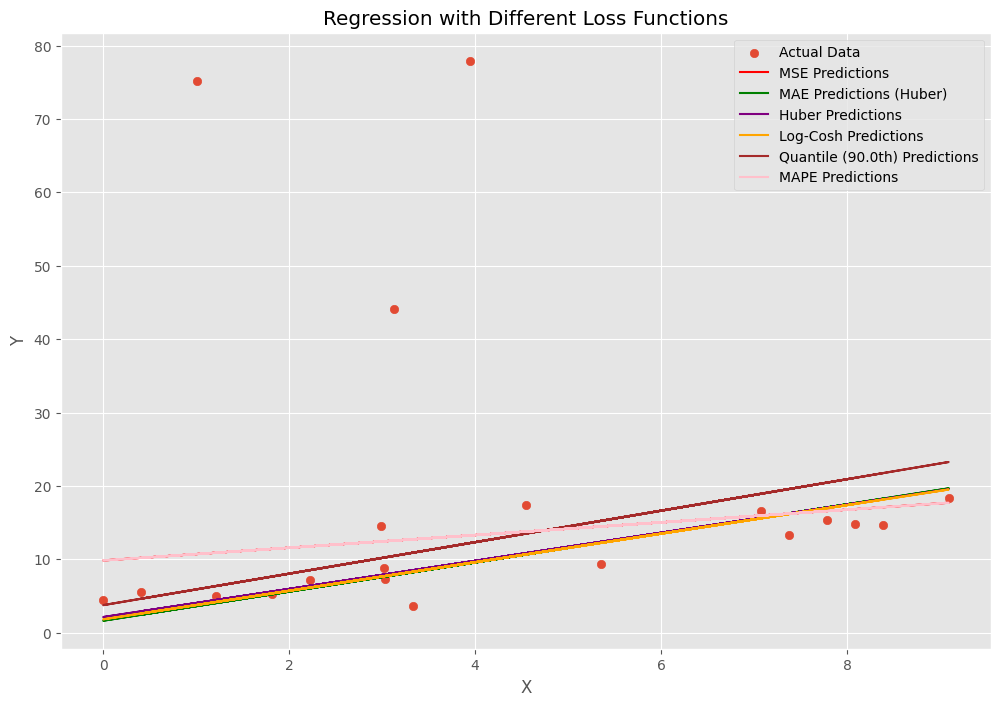

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Generate synthetic data with outliers
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, 100)
X[np.random.randint(0, 100, 10)] = np.random.uniform(0, 10, 10).reshape(-1, 1)
y[np.random.randint(0, 100, 10)] = y[np.random.randint(0, 100, 10)] * 4 + np.random.normal(0, 5, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# 1. Mean Squared Error (MSE)
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)
y_pred_mse = model_mse.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mse)
r2_mse = r2_score(y_test, y_pred_mse)

# 2. Mean Absolute Error (MAE) - Using Huber Regressor as a proxy
model_mae = HuberRegressor(epsilon=1.35)
model_mae.fit(X_train, y_train)
y_pred_mae = model_mae.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_mae)
r2_mae = r2_score(y_test, y_pred_mae)

# 3. Huber Loss
model_huber = HuberRegressor(epsilon=2.0)
model_huber.fit(X_train, y_train)
y_pred_huber = model_huber.predict(X_test)
huber_mse = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# 4. Log-Cosh Loss (PyTorch)
class LogCoshLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true)))

model_logcosh = nn.Linear(1, 1)
criterion_logcosh = LogCoshLoss()
optimizer_logcosh = torch.optim.Adam(model_logcosh.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    y_pred_torch = model_logcosh(X_train_torch)
    loss = criterion_logcosh(y_pred_torch, y_train_torch)
    optimizer_logcosh.zero_grad()
    loss.backward()
    optimizer_logcosh.step()

y_pred_logcosh = model_logcosh(X_test_torch).detach().numpy()
logcosh_mse = mean_squared_error(y_test, y_pred_logcosh)
r2_logcosh = r2_score(y_test, y_pred_logcosh)

# 5. Quantile Loss (PyTorch)
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super().__init__()
        self.quantile = quantile

    def forward(self, y_pred, y_true):
        errors = y_true - y_pred
        return torch.mean(torch.max((self.quantile - 1) * errors, self.quantile * errors))

quantile = 0.9  # 90th percentile
model_quantile = nn.Linear(1, 1)
criterion_quantile = QuantileLoss(quantile)
optimizer_quantile = torch.optim.Adam(model_quantile.parameters(), lr=0.01)

for epoch in range(num_epochs):
    y_pred_torch = model_quantile(X_train_torch)
    loss = criterion_quantile(y_pred_torch, y_train_torch)
    optimizer_quantile.zero_grad()
    loss.backward()
    optimizer_quantile.step()

y_pred_quantile = model_quantile(X_test_torch).detach().numpy()
quantile_mse = mean_squared_error(y_test, y_pred_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)

# 6. Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) # Convert to numpy for element-wise operations
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Percentage error

model_mape = LinearRegression()
model_mape.fit(X_train, y_train)
y_pred_mape = model_mape.predict(X_test)
mape_loss = mape(y_test, y_pred_mape) # Calculate MAPE
r2_mape = r2_score(y_test, y_pred_mape) # Evaluate using R-squared

# Print and Plot
print("MSE Model:")
print(f"  MSE: {mse}")
print(f"  R-squared: {r2_mse}")

print("\nMAE Model (Huber Regressor):")
print(f"  MAE: {mae}")
print(f"  R-squared: {r2_mae}")

print("\nHuber Loss Model:")
print(f"  MSE: {huber_mse}")
print(f"  R-squared: {r2_huber}")

print("\nLog-Cosh Loss Model:")
print(f"  MSE: {logcosh_mse}")
print(f"  R-squared: {r2_logcosh}")

print(f"\nQuantile Loss ({quantile*100}th percentile) Model:")
print(f"  MSE: {quantile_mse}")
print(f"  R-squared: {r2_quantile}")

print("\nMAPE Model:")
print(f"  MAPE: {mape_loss}")
print(f"  R-squared: {r2_mape}")


plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred_mse, color='red', label="MSE Predictions")
plt.plot(X_test, y_pred_mae, color='green', label="MAE Predictions (Huber)")
plt.plot(X_test, y_pred_huber, color='purple', label="Huber Predictions")
plt.plot(X_test, y_pred_logcosh, color='orange', label="Log-Cosh Predictions")
plt.plot(X_test, y_pred_quantile, color='brown', label=f"Quantile ({quantile*100}th) Predictions")
plt.plot(X_test, y_pred_mape, color='pink', label="MAPE Predictions")


plt.legend()
plt.title("Regression with Different Loss Functions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Analysis (expanded)
# MSE: Sensitive to outliers. Good for general regression tasks when outliers are not a major concern. Minimizes variance.
# MAE: Robust to outliers. Good when outliers are present and you want a model that predicts the median. Minimizes median absolute deviation.
# Huber: Balances MSE and MAE. Less sensitive to outliers than MSE but


Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Generate synthetic data with outliers
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, 100)
X[np.random.randint(0, 100, 10)] = np.random.uniform(0, 10, 10).reshape(-1, 1)
y[np.random.randint(0, 100, 10)] = y[np.random.randint(0, 100, 10)] * 4 + np.random.normal(0, 5, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# 1. Mean Squared Error (MSE)
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)
y_pred_mse = model_mse.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mse)
r2_mse = r2_score(y_test, y_pred_mse)

# 2. Mean Absolute Error (MAE) - Using Huber Regressor as a proxy
model_mae = HuberRegressor(epsilon=1.35)
model_mae.fit(X_train, y_train)
y_pred_mae = model_mae.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_mae)
r2_mae = r2_score(y_test, y_pred_mae)

# 3. Huber Loss
model_huber = HuberRegressor(epsilon=2.0)
model_huber.fit(X_train, y_train)
y_pred_huber = model_huber.predict(X_test)
huber_mse = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# 4. Log-Cosh Loss (PyTorch)
class LogCoshLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true)))

model_logcosh = nn.Linear(1, 1)  # PyTorch Linear Regression
criterion_logcosh = LogCoshLoss()
optimizer_logcosh = torch.optim.Adam(model_logcosh.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    y_pred_torch = model_logcosh(X_train_torch)
    loss = criterion_logcosh(y_pred_torch, y_train_torch)
    optimizer_logcosh.zero_grad()
    loss.backward()
    optimizer_logcosh.step()

y_pred_logcosh = model_logcosh(X_test_torch).detach().numpy()
logcosh_mse = mean_squared_error(y_test, y_pred_logcosh)
r2_logcosh = r2_score(y_test, y_pred_logcosh)

# 5. Quantile Loss (PyTorch)
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super().__init__()
        self.quantile = quantile

    def forward(self, y_pred, y_true):
        errors = y_true - y_pred
        return torch.mean(torch.max((self.quantile - 1) * errors, self.quantile * errors))

quantile = 0.9  # 90th percentile
model_quantile = nn.Linear(1, 1)  # PyTorch Linear Regression
criterion_quantile = QuantileLoss(quantile)
optimizer_quantile = torch.optim.Adam(model_quantile.parameters(), lr=0.01)

for epoch in range(num_epochs):
    y_pred_torch = model_quantile(X_train_torch)
    loss = criterion_quantile(y_pred_torch, y_train_torch)
    optimizer_quantile.zero_grad()
    loss.backward()
    optimizer_quantile.step()

y_pred_quantile = model_quantile(X_test_torch).detach().numpy()
quantile_mse = mean_squared_error(y_test, y_pred_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)

# Print and Plot
# ... (rest of the code for printing and plotting remains the same)


Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset (you can replace with other datasets)
X, y = fetch_california_housing(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (essential for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_knn(X_train, y_train, X_test, y_test, k, dataset_name):
    """Evaluates KNN regression for a specific value of k."""
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Dataset: {dataset_name}")
    print(f"K: {k}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

    # Plotting (adapt for higher dimensions if needed)
    if X_test.shape[1] == 1: # Only plot if 1D
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, label="Actual Data")
        plt.scatter(X_test, y_pred, color='red', label=f"KNN Predictions (k={k})")
        plt.legend()
        plt.title(f"KNN Regression on {dataset_name} (k={k})")
        plt.xlabel("Feature 1")
        plt.ylabel("Target")
        plt.show()
    elif X_test.shape[1] == 2: # Plot if 2D
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:,0], y_test, label="Actual Data")
        plt.scatter(X_test[:,0], y_pred, color='red', label=f"KNN Predictions (k={k})")
        plt.legend()
        plt.title(f"KNN Regression on {dataset_name} (k={k})")
        plt.xlabel("Feature 1")
        plt.ylabel("Target")
        plt.show()
    else:
        print("Plotting not supported for datasets with more than 2 features.")

    return mse, r2


# Experiment with k=1
mse_1, r2_1 = evaluate_knn(X_train, y_train, X_test, y_test, 1, "California Housing")

# Experiment with k = size of training set
k_large = len(X_train)
mse_large, r2_large = evaluate_knn(X_train, y_train, X_test, y_test, k_large, "California Housing")


print("\n--- Comparison ---")
print("K=1:")
print(f"  MSE: {mse_1}")
print(f"  R-squared: {r2_1}")

print(f"\nK={k_large} (Training Set Size):")
print(f"  MSE: {mse_large}")
print(f"  R-squared: {r2_large}")

# Analysis:
# K=1:  Expect overfitting. The model will perfectly memorize the training data, likely leading to very low error on training data but high error on test data.  It's very sensitive to noise.

# K=Training Set Size:  The model will essentially predict the average of the training set for all test points.  This is because every test point will be "closest" to all training points equally.  Expect underfitting and poor performance.

Dataset: California Housing
K: 1
MSE: 0.6690121695201793
R-squared: 0.48946307555198154
Plotting not supported for datasets with more than 2 features.
Dataset: California Housing
K: 16512
MSE: 1.3106960720039365
R-squared: -0.00021908714592466794
Plotting not supported for datasets with more than 2 features.

--- Comparison ---
K=1:
  MSE: 0.6690121695201793
  R-squared: 0.48946307555198154

K=16512 (Training Set Size):
  MSE: 1.3106960720039365
  R-squared: -0.00021908714592466794


Try out KNN-regression on other datasets see which values of K give the best results.

Dataset: California Housing
Best K: 11
MSE: 0.41859323965701034
R-squared: 0.6805629031793323


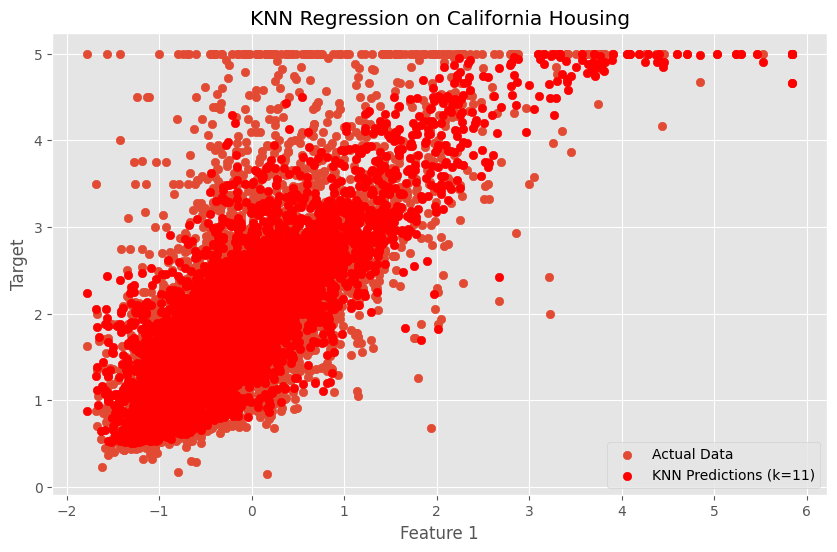

Dataset: Diabetes
Best K: 18
MSE: 3057.9618532390064
R-squared: 0.4228247890228536


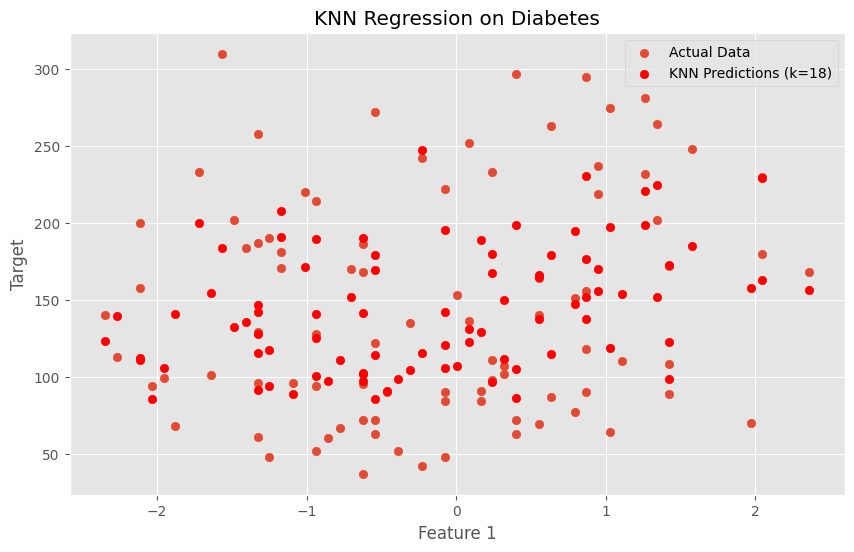

Dataset: Synthetic
Best K: 3
MSE: 278.3100472552617
R-squared: 0.9702882166864987


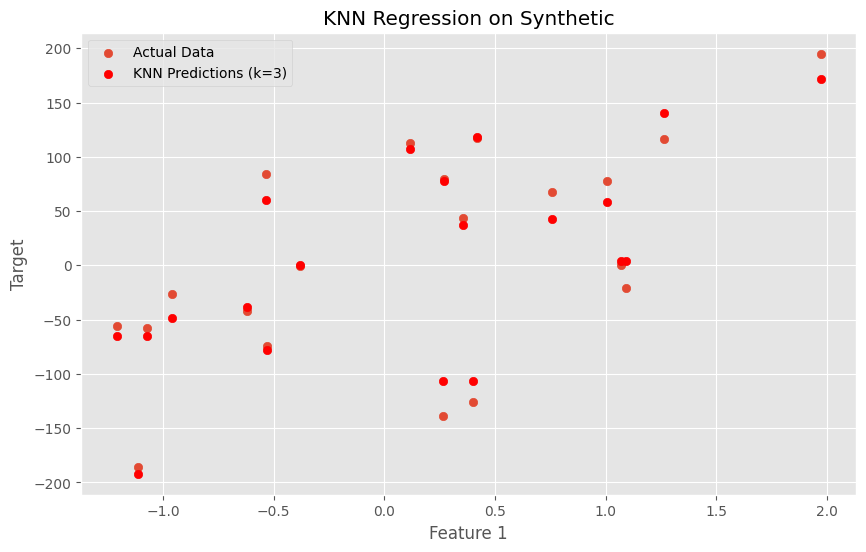


--- Summary of Best K and Performance ---
California Housing:
  Best K: 11
  MSE: 0.41859323965701034
  R-squared: 0.6805629031793323
Diabetes:
  Best K: 18
  MSE: 3057.9618532390064
  R-squared: 0.4228247890228536
Synthetic:
  Best K: 3
  MSE: 278.3100472552617
  R-squared: 0.9702882166864987


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_diabetes, make_regression  # Example datasets

def evaluate_knn(X_train, y_train, X_test, y_test, dataset_name):
    """Evaluates KNN regression for different values of k and returns the best k and its performance."""

    param_grid = {'n_neighbors': range(1, 21)}  # Test k from 1 to 20
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  # Use GridSearchCV for efficient k-tuning
    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Dataset: {dataset_name}")
    print(f"Best K: {best_k}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, label="Actual Data") # Assuming 1 feature for plotting, adapt as needed.
    plt.scatter(X_test[:, 0], y_pred, color='red', label=f"KNN Predictions (k={best_k})")
    plt.legend()
    plt.title(f"KNN Regression on {dataset_name}")
    plt.xlabel("Feature 1")  # Adapt labels
    plt.ylabel("Target")
    plt.show()

    return best_k, mse, r2


# Datasets to experiment with
datasets = {
    "California Housing": fetch_california_housing(return_X_y=True),
    "Diabetes": load_diabetes(return_X_y=True),
    "Synthetic": make_regression(n_samples=100, n_features=2, noise=0.5, random_state=42),  # Example synthetic data
}

results = {}  # Store best k and performance for each dataset

for name, (X, y) in datasets.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling (important for KNN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_k, mse, r2 = evaluate_knn(X_train, y_train, X_test, y_test, name)
    results[name] = {"best_k": best_k, "mse": mse, "r2": r2}


# Summary of results
print("\n--- Summary of Best K and Performance ---")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Best K: {metrics['best_k']}")
    print(f"  MSE: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")

Explore other loss functions and try to understand when and why they are used.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Generate synthetic data with outliers
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, 100)
X[np.random.randint(0, 100, 10)] = np.random.uniform(0, 10, 10).reshape(-1, 1)
y[np.random.randint(0, 100, 10)] = y[np.random.randint(0, 100, 10)] * 4 + np.random.normal(0, 5, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# 1. Mean Squared Error (MSE)
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)
y_pred_mse = model_mse.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mse)
r2_mse = r2_score(y_test, y_pred_mse)

# 2. Mean Absolute Error (MAE) - Using Huber Regressor as a proxy
model_mae = HuberRegressor(epsilon=1.35)
model_mae.fit(X_train, y_train)
y_pred_mae = model_mae.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_mae)
r2_mae = r2_score(y_test, y_pred_mae)

# 3. Huber Loss
model_huber = HuberRegressor(epsilon=2.0)
model_huber.fit(X_train, y_train)
y_pred_huber = model_huber.predict(X_test)
huber_mse = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# 4. Log-Cosh Loss (PyTorch)
class LogCoshLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_pred, y_true):
        return torch.mean(torch.log(torch.cosh(y_pred - y_true)))

model_logcosh = nn.Linear(1, 1)
criterion_logcosh = LogCoshLoss()
optimizer_logcosh = torch.optim.Adam(model_logcosh.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    y_pred_torch = model_logcosh(X_train_torch)
    loss = criterion_logcosh(y_pred_torch, y_train_torch)
    optimizer_logcosh.zero_grad()
    loss.backward()
    optimizer_logcosh.step()

y_pred_logcosh = model_logcosh(X_test_torch).detach().numpy()
logcosh_mse = mean_squared_error(y_test, y_pred_logcosh)
r2_logcosh = r2_score(y_test, y_pred_logcosh)

# 5. Quantile Loss (PyTorch)
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super().__init__()
        self.quantile = quantile

    def forward(self, y_pred, y_true):
        errors = y_true - y_pred
        return torch.mean(torch.max((self.quantile - 1) * errors, self.quantile * errors))

quantile = 0.9  # 90th percentile
model_quantile = nn.Linear(1, 1)
criterion_quantile = QuantileLoss(quantile)
optimizer_quantile = torch.optim.Adam(model_quantile.parameters(), lr=0.01)

for epoch in range(num_epochs):
    y_pred_torch = model_quantile(X_train_torch)
    loss = criterion_quantile(y_pred_torch, y_train_torch)
    optimizer_quantile.zero_grad()
    loss.backward()
    optimizer_quantile.step()

y_pred_quantile = model_quantile(X_test_torch).detach().numpy()
quantile_mse = mean_squared_error(y_test, y_pred_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)

# 6. Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_mape = LinearRegression()
model_mape.fit(X_train, y_train)
y_pred_mape = model_mape.predict(X_test)
mape_loss = mape(y_test, y_pred_mape)
r2_mape = r2_score(y_test, y_pred_mape)

# 7. RMSLE (Root Mean Squared Logarithmic Error)
def rmsle(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Ensure positive values to avoid log issues:
    y_pred = np.maximum(y_pred, 0) # or clip to a small positive value
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))

model_rmsle = LinearRegression()
model_rmsle.fit(X_train, y_train)
y_pred_rmsle = model_rmsle.predict(X_test)
rmsle_loss = rmsle(y_test, y_pred_rmsle)
r2_rmsle = r2_score(y_test, y_pred_rmsle)


# Print and Plot
print("MSE Model:")
print(f"  MSE: {mse}")
print(f"  R-squared: {r2_mse}")

print("\nMAE Model (Huber Regressor):")
print(f"  MAE: {mae}")
print(f"  R-squared: {r2_mae}")

print("\nHuber Loss Model:")
print(f"  MSE: {huber_mse}")
print(f"  R-squared: {r2_huber}")

print("\nLog-Cosh Loss Model:")
print(f"  MSE: {logcosh_mse}")
print(f"  R-squared: {r2_logcosh}")

print(f"\nQuantile Loss ({quantile*100}th percentile) Model:")
print(f"  MSE: {quantile_mse}")
print(f"  R-squared: {r2_quantile}")

print("\nMAPE Model:")
print(f"  MAPE: {mape_loss}")
print(f"  R-squared: {r2_mape}")

print("\nRMSLE Model:")
print(f"  RMSLE: {rmsle_loss}")
print(f"  R-squared: {r2_rmsle}")

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred_mse, color='red', label="MSE Predictions")
plt.plot(X_test, y_pred_mae, color='green', label="MAE Predictions (Huber

SyntaxError: unterminated string literal (detected at line 153) (<ipython-input-26-3dd9e30c8cee>, line 153)

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood